<a href="https://colab.research.google.com/github/Ariful-Anik/Collab-repo/blob/main/CSE_475_Ariful_Assingment_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [10]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arifulanik","key":"96fc1b48ebe5e640caf6af990e92b818"}'}

In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
# Replace 'username/dataset-name' with the dataset identifier from the Kaggle URL
!kaggle datasets download -d krishujeniya/heart-diseae


Dataset URL: https://www.kaggle.com/datasets/krishujeniya/heart-diseae
License(s): MIT
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 7.88MB/s]


In [13]:
import zipfile

# Replace 'world-happiness.zip' with the actual downloaded file name
with zipfile.ZipFile("heart-diseae.zip", 'r') as zip_ref:
    zip_ref.extractall("heart-diseae")
# /content/heart-diseae/heart-disease.csv

##Library loading

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#These are popular ensemble methods used for classification (RandomForestClassifier, GradientBoostingClassifier)
#This is an ensemble model that combines multiple classifiers to
#improve prediction accuracy (VotingClassifier)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

#A simple and widely used
#linear classifier, commonly used as a baseline in classification tasks.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Used to standardize features by removing the mean and
#scaling to unit variance, which improves model performance(StandardScaler)

#Used to transform categorical data into a numerical format by encoding
#categorical variables as binary (one-hot) vectors(OneHotEncoder)

from sklearn.preprocessing import StandardScaler, OneHotEncoder

#A powerful tool for transforming specific columns in a dataframe,
#often used to apply different preprocessing steps to numerical
#and categorical columns.
from sklearn.compose import ColumnTransformer


In [15]:
df = pd.read_csv('/content/heart-diseae/heart-disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Data Preprocessing
- Handle missing values, if any.
- Encode categorical variables.
- Feature scaling (if necessary)

In [16]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())
# Data types and null values
df.info()
# Summary of numerical features
df.describe()


Shape of the dataset: (303, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
# Count duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1


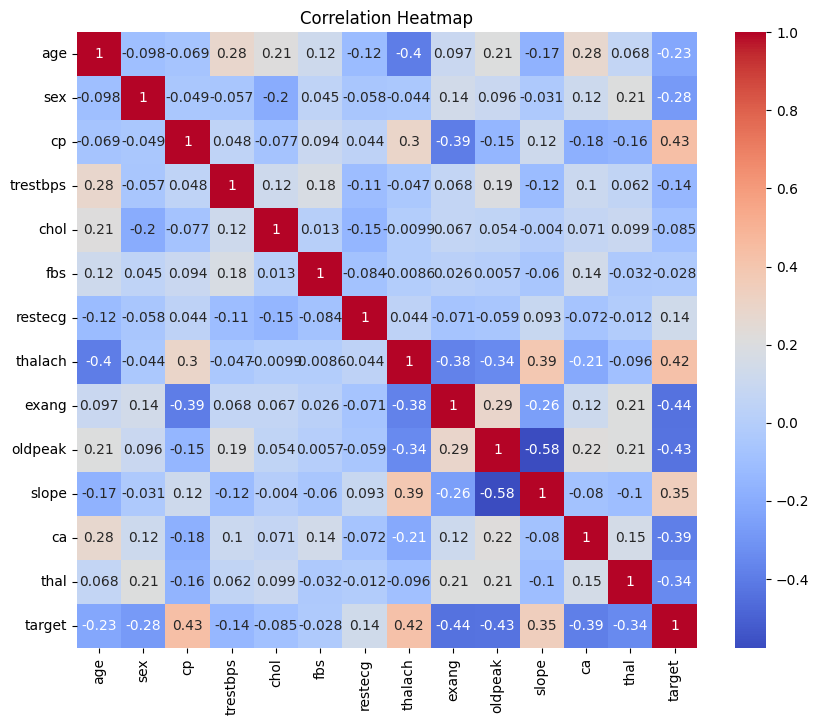

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-12-7668b20d7fc8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='viridis')


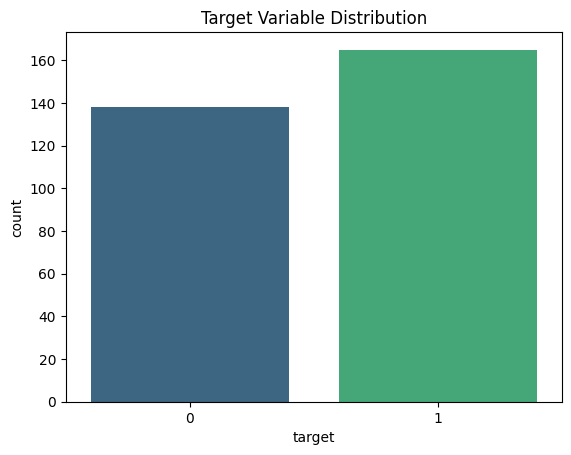

Target Distribution (%):
 target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


In [12]:
# Check distribution of the target variable (e.g., 'target')
sns.countplot(data=df, x='target', palette='viridis')
plt.title("Target Variable Distribution")
plt.show()

# Percentage distribution
target_counts = df['target'].value_counts(normalize=True) * 100
print("Target Distribution (%):\n", target_counts)


In [17]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
X = X = df.drop(['target','trestbps','chol','fbs','restecg'], axis=1)
print(X)

#Many machine learning algorithms in Python
#(especially in libraries like scikit-learn)
#expect class labels to start from 0. This
#adjustment simplifies compatibility with
#these algorithms and avoids indexing issues.
# y = df['loan_status']-1
y = df['target']
#Selects the columns containing categorical data
categorical_features = X.select_dtypes(include=['object']).columns

#Selects columns containing numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

#Data Preprocessing:

# Standard scaling for numerical features only

#will adjust the data so that each feature has
#a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

#first learns the mean and standard deviation for
#each numerical feature in X.
#This helps ensure that all numerical features are on a similar scale.

#this process centers the data around zero and adjusts the scale,
#which often improves the performance of machine learning models
#by preventing any one feature from dominating due to its larger scale.
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# One-hot encoding for categorical features only

#The OneHotEncoder converts categorical variables
#into binary (one-hot) encoded variables.
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

# Concatenate the scaled numerical and encoded categorical data

#Concatenates the scaled numerical and encoded categorical arrays horizontally,
#combining them into a single dataset.
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

#Stores the preprocessed features in data_X for modeling
data_X = final_df.copy()

     age  sex  cp  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3      150      0      2.3      0   0     1
1     37    1   2      187      0      3.5      0   0     2
2     41    0   1      172      0      1.4      2   0     2
3     56    1   1      178      0      0.8      2   0     2
4     57    0   0      163      1      0.6      2   0     2
..   ...  ...  ..      ...    ...      ...    ...  ..   ...
298   57    0   0      123      1      0.2      1   0     3
299   45    1   3      132      0      1.2      1   0     3
300   68    1   0      141      0      3.4      1   2     3
301   57    1   0      115      1      1.2      1   1     3
302   57    0   1      174      0      0.0      1   1     2

[303 rows x 9 columns]


In [19]:
data_X.head()

age       sex        cp   thalach     exang   oldpeak     slope  \
0  0.952197  0.681005  1.973123  0.015443 -0.696631  1.087338 -2.274579   
1 -1.915313  0.681005  1.002577  1.633471 -0.696631  2.122573 -2.274579   
2 -1.474158 -1.468418  0.032031  0.977514 -0.696631  0.310912  0.976352   
3  0.180175  0.681005  0.032031  1.239897 -0.696631 -0.206705  0.976352   
4  0.290464 -1.468418 -0.938515  0.583939  1.435481 -0.379244  0.976352   

         ca      thal  
0 -0.714429 -2.148873  
1 -0.714429 -0.512922  
2 -0.714429 -0.512922  
3 -0.714429 -0.512922  
4 -0.714429 -0.512922

In [20]:
X = data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Bagging Approach: Random Forest

In [23]:
#Random Forest Classifier Initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#Training the Model
rf_model.fit(X_train, y_train)
#Making Predictions
rf_pred = rf_model.predict(X_test)
#Evaluating the Model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8360655737704918


## Boosting Approach: Gradient Boosting

In [24]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.7868852459016393


## Boosting Approach: Ada Boosting

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create and fit the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = adaboost_model.predict(X_test)

# Calculate and print accuracy
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7704918032786885


## Stacking Approach
- Use a meta-classifier (e.g., Logistic Regression) on top of base learners

In [38]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

#The stacking model uses a list of base learners—Random Forest,
#Gradient Boosting, and XGBoost classifiers—each with 100 estimators
#and a fixed random state for reproducibility.

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner

# Logistic Regression is chosen as the meta-learner,
#which combines the predictions from the base learners to make final predictions. The meta-learner is often a simpler model (e.g., Logistic Regression or Decision Tree)
#that helps synthesize the information from the base models.
meta_learner = LogisticRegression()

# Set up the stacking model

#This line initializes the stacking classifier,
#which combines the base models and uses the meta-learner
#for final predictions. Cross-validation (cv=5) is
#used within the stacking process to improve robustness.
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=2)
stacking_model.fit(X_train, y_train)

Stacking Model Accuracy: 0.819672131147541


StackingClassifier(cv=2,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

# More Accuracy stacking (GOT 85%)

In [26]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Feature scaling
scaler = StandardScaler()

# Define base learners with tuned hyperparameters
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

# Define meta-learner (use a stronger model for the meta-learner)
meta_learner = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=2, random_state=42)

# Create pipeline with scaling
stacking_model = Pipeline([
    ('scaler', scaler),
    ('stack', StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5))
])

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions
stacking_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))
print("Stacking Model ROC-AUC Score:", roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, stacking_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking Model Accuracy: 0.8524590163934426
Stacking Model ROC-AUC Score: 0.8938577586206897

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61




# **- Combine multiple classifiers by voting.**

In [27]:
#This ensemble model combines several base models—Random Forest,
#Gradient Boosting, and Support Vector Classifier (SVC)—to
#make predictions. The voting='soft' parameter indicates that
#the classifier will use the probabilities predicted by each model
#and then average them to make final predictions.
#This "soft voting" often yields better results when
#the models provide probability estimates.


vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))


Voting Classifier Accuracy: 0.8524590163934426


## Evaluation
- Compare the performance of all models.


In [28]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stacking_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))


Random Forest: 0.8360655737704918
Gradient Boosting: 0.7868852459016393
Stacking Model: 0.8524590163934426
Voting Classifier: 0.8524590163934426


# Cross-Validation Performance Comparison
* Use cross_val_score from sklearn.model_selection to perform cross-validation and evaluate each ensemble model's accuracy across folds.
* Set cv=5 for 5-fold cross-validation (can be adjusted based on preference or dataset size).

1. Model Definitions:
You define four models: Random Forest, Gradient Boosting, Stacking, and Voting.

Each model is instantiated with specific configurations:

Random Forest and Gradient Boosting are set up with 100 estimators.

Stacking combines Random Forest and SVC, with Logistic Regression as the meta-learner.

Voting combines Random Forest, Gradient Boosting, and SVC using soft voting (i.e., probability averaging).

In [29]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results

#scores.mean() gives the average accuracy across all folds.
#scores.std() provides the variability in accuracy between the folds.
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, data_X, y, cv=2, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.8217 ± 0.0204
Gradient Boosting Cross-Validation Accuracy: 0.8217 ± 0.0138
Stacking Cross-Validation Accuracy: 0.8250 ± 0.0237
Voting Cross-Validation Accuracy: 0.8250 ± 0.0237


##  Visualizing Cross-Validation Results

1.   List item
2.   List item



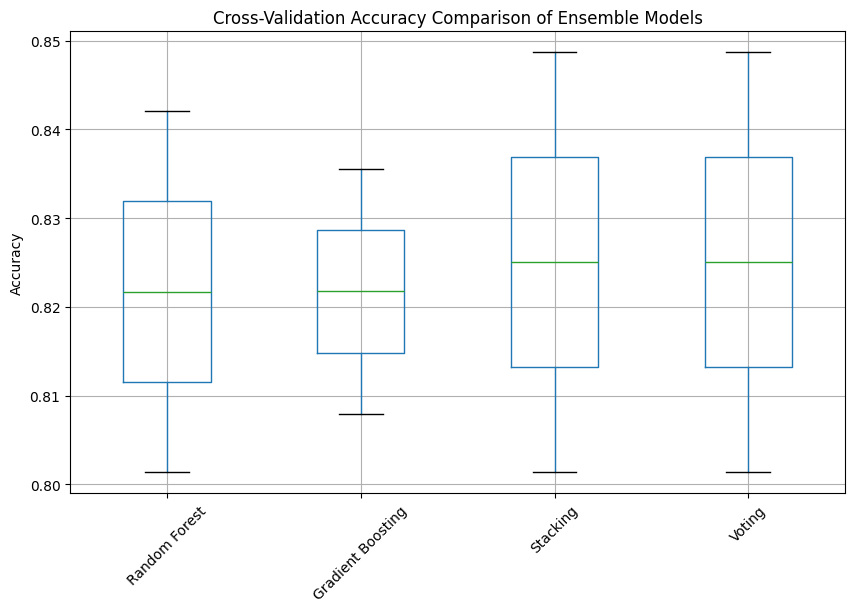

'It seems that the box plot shows perfect accuracy across all models,\nleading to a flat line around 1.0. This could happen if the models are\noverfitting or the dataset is too simple.'

In [30]:
import matplotlib.pyplot as plt

# Prepare results for visualization
import pandas as pd

#converted into a pandas DataFrame (results_df).
#This allows for easier manipulation and visualization.
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


'''It seems that the box plot shows perfect accuracy across all models,
leading to a flat line around 1.0. This could happen if the models are
overfitting or the dataset is too simple.'''


#General Observations:
- Random Forest seems to be the most stable and performing model in terms of cross-validation accuracy, with a relatively higher median accuracy.

- Voting appears to have more variability and lower median accuracy compared to the others, suggesting that combining models in a "soft voting" scheme did not lead to better results for this particular dataset.

- Stacking and Gradient Boosting have comparable performance, with slightly less variability than Voting but are not as consistent as Random Forest.

## Confusion Matrix for Each Model

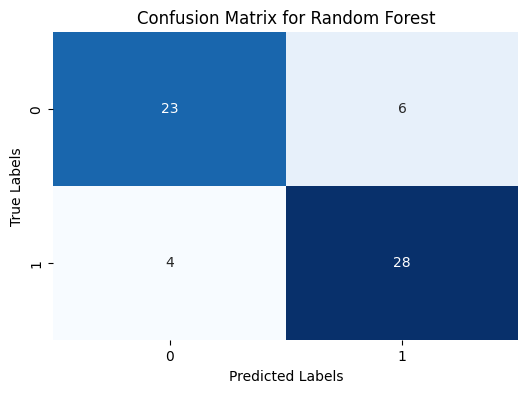

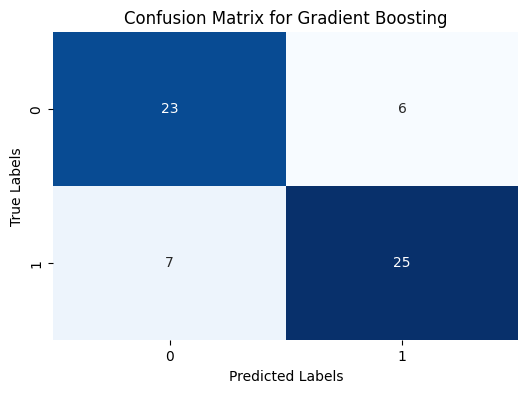

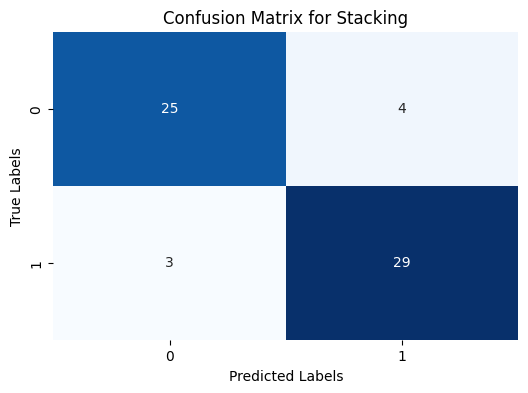

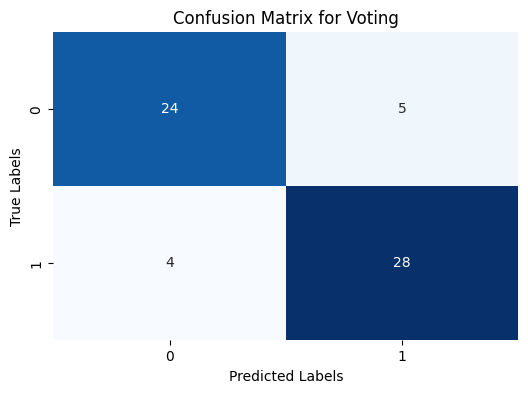

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


## Precision and Recall for Each Model

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.8370
 - Recall: 0.8361
 - F1 Score: 0.8356

Gradient Boosting Performance Metrics:
 - Precision: 0.7875
 - Recall: 0.7869
 - F1 Score: 0.7870

Stacking Performance Metrics:
 - Precision: 0.8855
 - Recall: 0.8852
 - F1 Score: 0.8851

Voting Performance Metrics:
 - Precision: 0.8526
 - Recall: 0.8525
 - F1 Score: 0.8523



## Summary of Metrics

In [58]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:17:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance Summary:


Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.836066   0.836994  0.836066  0.835622
1  Gradient Boosting  0.786885   0.787537  0.786885  0.787000
2           Stacking  0.852459   0.853076  0.852459  0.852538
3             Voting  0.852459   0.852601  0.852459  0.852300

# Key Insights:
- Random Forest has the highest Accuracy (0.836) among the models, with balanced Precision, Recall, and F1 Score.

- Gradient Boosting shows the lowest Accuracy (0.787), with corresponding Precision, Recall, and F1 Score that are also the lowest.

- Stacking and Voting models have similar performance with an Accuracy of 0.852, Precision, Recall, and F1 Score are all strong, making these models suitable for the task. Both are slightly better than Random Forest in Recall and F1 Score.


# Explainable AI (XAI)

In [33]:
import shap

# Use a subset of the data for SHAP to reduce computation time

#This code uses SHAP to explain the predictions of the Random Forest model
#on a subset of the test data.
X_sample = X_test.sample(60, random_state=42) # 300 record so remember to take 20%


# Initialize SHAP explainer for the Random Forest model

#This initializes a TreeExplainer for the Random Forest model. The TreeExplainer is efficient
#for tree-based models (like Random Forest) and computes SHAP values to explain the output of
#individual predictions.
explainer = shap.TreeExplainer(models["Random Forest"])

#This computes the SHAP values for each feature in the sample data.
#The SHAP values represent how much each feature contributes to the difference between the prediction
#and the expected output (mean prediction).
shap_values = explainer.shap_values(X_sample)

# **illustrates the feature importance in terms of the average impact each feature has on the model's predictions**

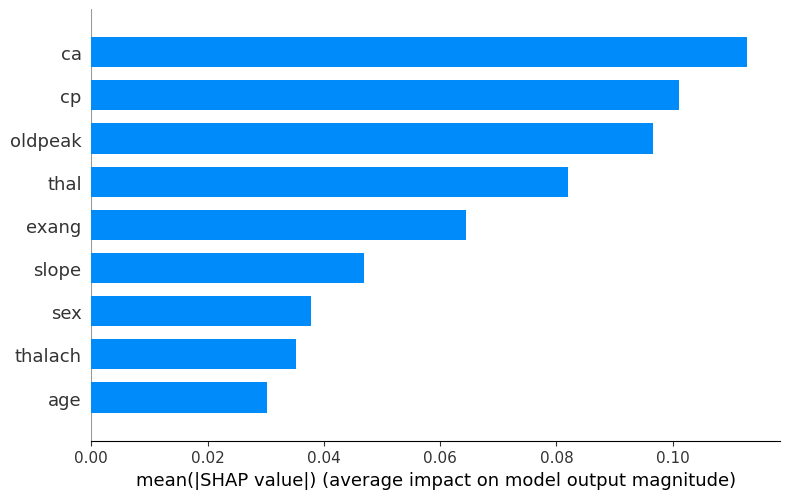

In [34]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature

#This step calculates the mean absolute SHAP value for each feature.

#The shap_values array contains the SHAP values for all instances in X_sample,
#and by taking the absolute value and averaging across all instances, we get
#an overall measure of each feature's contribution to the model's predictions.

mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )

#If there are multiple classes (for multi-class classification), this line computes the mean
#SHAP value across all classes, collapsing the results to a single value for each feature.

mean_shap_values = np.mean(mean_shap_values, axis=1)



# Repeat this vector to create a matrix that matches X_sample's shape

#This step repeats the mean_shap_values for each row in the sample data.
#This is necessary to create a shape that matches the original X_sample for visualization.
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))


# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)


#Key Insights from the Plot:
  * Most Important Features:

 *  ca (number of major vessels colored by fluoroscopy) and cp (chest pain type) are the most influential features, having the highest impact on model output.
* oldpeak (depression induced by exercise relative to rest), thal (thalassemia), and exang (exercise induced angina) also contribute significantly.

* Less Important Features:

 * thalach (maximum heart rate achieved), sex, and age have lower mean absolute SHAP values, suggesting they have a relatively lesser impact on the predictions compared to other features.

## Explaining Model Predictions Using LIME

1.   List item
2.   List item



In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e781eeea52a487aeae8295a758377244c680611fc4b6f973161bc494d6cd8e8a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **LIME's LimeTabularExplainer provides a simple way to explain individual

---

predictions of a model by approximating it locally with an interpretable model, highlighting the most influential features for that prediction.**

In [36]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=data_X.columns, class_names=y.values, mode='classification')

# Choose a sample from the test set to explain
sample_index = 0 # Adjust to analyze a different sample

#Generate the Explanation
#This generates a local explanation for the chosen test instance using the Random Forest model’s predicted probabilities

exp = lime_explainer.explain_instance(X_test.values[sample_index], models["Random Forest"].predict_proba, num_features=10)
print(X_test.values[sample_index])
# Display the explanation
exp.show_in_notebook()
exp.show_in_notebook(show_table=True, show_all=False)


[ 0.29046364  0.68100522 -0.93851463 -1.6463164   1.43548113 -0.37924438
 -0.64911323  0.26508221 -2.14887271]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Choose a valid sample index
sample_index = 6  # Replace with a valid index, or use np.random.randint(0, len(X_test))


# Ensure feature_names and class_names are valid strings
feature_names = final_columns

# Ensure that class names in LIME are ordered the same way as the model output
class_names = [str(cls) for cls in sorted(y.unique())]  # Sorting the class labels to ensure correct order

# Initialize the LIME explainer with the corrected class names
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Generate the explanation again
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],
    models["Random Forest"].predict_proba,
    num_features=10
)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Print the selected sample's feature values
print("\n\nFeature values of the selected sample:")
print(X_test.values[sample_index])

# Get the actual class of the selected sample
actual_class = y_test.values[sample_index]
print(f"Actual class: {actual_class}")

# Get the predicted class of the selected sample
predicted_class = models["Random Forest"].predict(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted class: {predicted_class}")

# Get the predicted probabilities of the selected sample
predicted_probabilities = models["Random Forest"].predict_proba(X_test.values[sample_index].reshape(1, -1))[0]
print(f"Predicted probabilities: {predicted_probabilities}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(




Feature values of the selected sample:
[-0.92271345 -1.46841752 -0.93851463  0.1029038   1.43548113 -0.89686172
 -0.64911323 -0.71442887 -0.51292188]
Actual class: 1
Predicted class: 1
Predicted probabilities: [0.36 0.64]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Key Elements in the Image:
* Prediction Probabilities:

 * Shows the probability of the instance being classified as:
 * Class 0: 36% (0.36)
 * Class 1: 64% (0.64)
 * The predicted class is 1, as its probability is higher.

* Feature Contributions:

 * Each feature (e.g., slope, thal, age) is shown with its value and the importance of its contribution to the prediction.
 * Orange bars: Push the prediction towards Class 1.
 * Blue bars: Push the prediction towards Class 0.
 * The length of each bar represents the magnitude of that feature's impact.
* Feature Values:

 * Displays the specific feature values for the selected instance (e.g., slope = -0.65, thal = -0.51).
 * These are the input values used for the prediction.
* Actual and Predicted Classes:

 * Actual class: The true label of the instance (in this case, 1).
Predicted class: The model's output for the instance (also 1).
